## Probit-Logit Models


In [38]:
import pandas as pd 
import numpy as np 

import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('probit_insurance.csv')

In [5]:
df.head(5)

,ins,retire,age,hstatusg,hhincome,educyear,married,hisp,personid,private,...,fair,poor,chronic,adl,seprhi,sretire,age2,agefem,agechr,agewhi
0,0,0,62,0,0.0,12,0,0,54963010,0,...,1,0,3,0,0,0,3844,62,186,0
1,0,0,59,0,0.0,12,0,0,21629010,0,...,1,0,1,3,0,0,3481,59,59,59
2,0,1,60,1,0.0,13,0,0,20421010,0,...,0,0,2,0,0,0,3600,0,120,0
3,0,0,62,0,0.0,10,0,0,38784010,0,...,1,0,4,3,0,0,3844,62,248,62
4,0,0,54,0,0.0,9,0,0,55630030,0,...,0,1,6,0,0,0,2916,54,324,54


In [9]:
df.describe()

,ins,retire,age,hstatusg,hhincome,educyear,married,hisp,personid,private,...,fair,poor,chronic,adl,seprhi,sretire,age2,agefem,agechr,agewhi
count,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3.206000e+03,3206.000000,...,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000
mean,0.387087,0.624766,66.913911,0.704616,45.263914,11.898628,0.733001,0.072676,4.862036e+07,0.387087,...,0.204928,0.090455,2.063319,0.301622,0.073612,0.388334,4490.978790,31.528072,137.496881,55.046475
std,0.487160,0.484259,3.675794,0.456286,64.339364,3.304611,0.442461,0.259645,2.317455e+07,0.487160,...,0.403712,0.286878,1.416434,0.825365,0.261179,0.487447,494.673453,33.032603,93.973693,25.939147
min,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000401e+07,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2704.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,65.000000,0.000000,17.001000,10.000000,0.000000,0.000000,3.188477e+07,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4225.000000,0.000000,67.000000,63.000000
50%,0.000000,1.000000,67.000000,1.000000,31.104000,12.000000,1.000000,0.000000,4.724152e+07,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4489.000000,0.000000,132.000000,66.000000
75%,1.000000,1.000000,69.000000,1.000000,52.800000,14.000000,1.000000,0.000000,7.148303e+07,1.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,4761.000000,66.000000,201.000000,68.000000
max,1.000000,1.000000,86.000000,1.000000,1312.124000,17.000000,1.000000,1.000000,9.956401e+07,1.000000,...,1.000000,1.000000,8.000000,5.000000,1.000000,1.000000,7396.000000,79.000000,544.000000,82.000000


In [8]:
df.isnull().sum()

ins         0
retire      0
age         0
hstatusg    0
hhincome    0
educyear    0
married     0
hisp        0
personid    0
private     0
eprhi       0
white       0
female      0
excel       0
vegood      0
good        0
fair        0
poor        0
chronic     0
adl         0
seprhi      0
sretire     0
age2        0
agefem      0
agechr      0
agewhi      0
dtype: int64

In [ ]:
y=df['ins'] #dependent Variable

In [ ]:
X=df[['retire','age','hstatusg','hhincome','educyear','married','hisp']] #independent variable

In [21]:
X

,retire,age,hstatusg,hhincome,educyear,married,hisp
0,0,62,0,0.000,12,0,0
1,0,59,0,0.000,12,0,0
2,1,60,1,0.000,13,0,0
3,0,62,0,0.000,10,0,0
4,0,54,0,0.000,9,0,0
...,...,...,...,...,...,...,...
3201,0,67,1,730.700,16,1,0
3202,0,70,1,730.700,16,1,0
3203,1,68,1,1197.704,16,1,0
3204,0,67,0,1197.704,17,1,0


### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# add intercept so that the model dosent pass throught the origin 
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

### Fitting

In [ ]:
logit_model = sm.Logit(y_train, X_train)
logit_results = logit_model.fit()
print(logit_results)


Optimization terminated successfully.
         Current function value: 0.622413
         Iterations 6


In [29]:
print(logit_results.summary())


                           Logit Regression Results                           
Dep. Variable:                    ins   No. Observations:                 2244
Model:                          Logit   Df Residuals:                     2236
Method:                           MLE   Df Model:                            7
Date:                Thu, 29 Jan 2026   Pseudo R-squ.:                 0.06611
Time:                        13:26:58   Log-Likelihood:                -1396.7
converged:                       True   LL-Null:                       -1495.6
Covariance Type:            nonrobust   LLR p-value:                 3.463e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1299      0.900     -2.367      0.018      -3.894      -0.366
retire         0.2566      0.102      2.526      0.012       0.057       0.456
age           -0.0090      0.014     -0.668      0.5

In [24]:
probit_model = sm.Probit(y_train, X_train)
probit_results = probit_model.fit()

print(probit_results.summary())


Optimization terminated successfully.
         Current function value: 0.622126
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                    ins   No. Observations:                 2244
Model:                         Probit   Df Residuals:                     2236
Method:                           MLE   Df Model:                            7
Date:                Thu, 29 Jan 2026   Pseudo R-squ.:                 0.06654
Time:                        13:21:08   Log-Likelihood:                -1396.1
converged:                       True   LL-Null:                       -1495.6
Covariance Type:            nonrobust   LLR p-value:                 1.850e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3178      0.552     -2.389      0.017      -2.399      -0.237
retire         0.1538      0.

In [35]:
logit_pred= logit_results.predict(X_test)
probit_pred= probit_results.predict(X_test)


In [36]:
logit_auc = roc_auc_score(y_test, logit_pred)
probit_auc = roc_auc_score(y_test, probit_pred)

print(f"Logit AUC:  {logit_auc:.3f}")
print(f"Probit AUC: {probit_auc:.3f}")


Logit AUC:  0.667
Probit AUC: 0.666


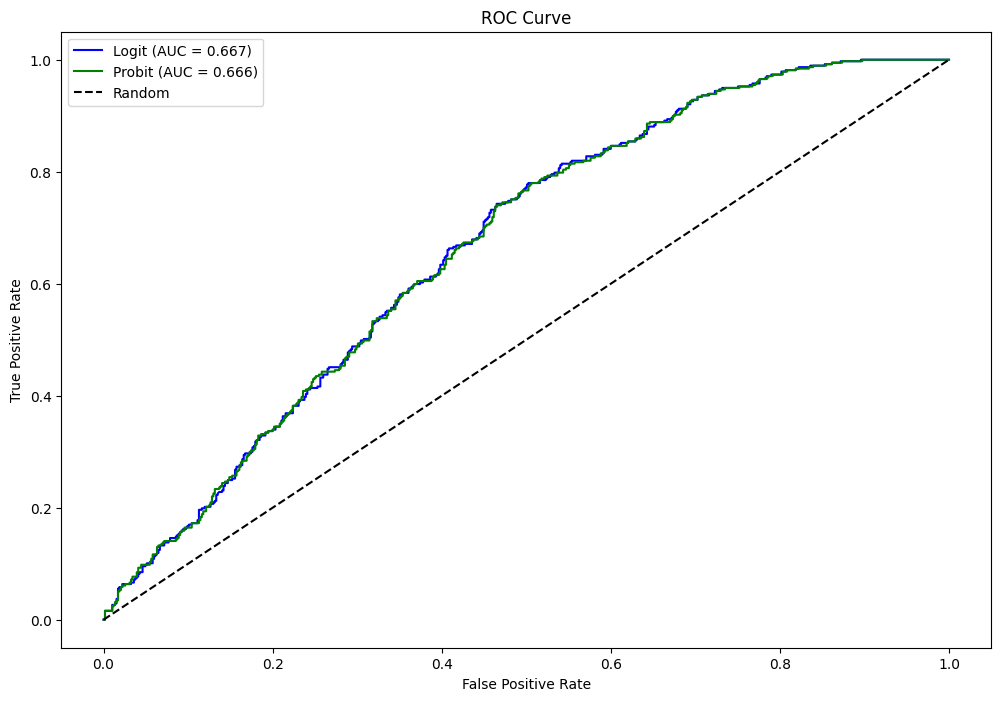

In [41]:
# Compute ROC curve
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_pred)
fpr_probit, tpr_probit, _ = roc_curve(y_test, probit_pred)

# Plot
plt.figure(figsize=(12,8))

plt.plot(fpr_logit, tpr_logit, color='blue', label=f'Logit (AUC = {logit_auc:.3f})')
plt.plot(fpr_probit, tpr_probit, color='green', label=f'Probit (AUC = {probit_auc:.3f})')

# Random guess line
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
# plt.grid(True)
plt.show()


In [ ]:
logit_pred_class = (logit_pred>= 0.5).astype(int)

confusion_matrix(y_test, logit_pred_class)


array([[490,  95],
       [273, 104]])

How much does the variable change the probability of being insured 

In [ ]:
logit_marginal = logit_results.get_margeff()
print(logit_marginal.summary())


        Logit Marginal Effects       
Dep. Variable:                    ins
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
retire         0.0557      0.022      2.539      0.011       0.013       0.099
age           -0.0020      0.003     -0.668      0.504      -0.008       0.004
hstatusg       0.0660      0.024      2.773      0.006       0.019       0.113
hhincome       0.0005      0.000      2.579      0.010       0.000       0.001
educyear       0.0244      0.004      6.914      0.000       0.018       0.031
married        0.1259      0.024      5.263      0.000       0.079       0.173
hisp          -0.1198      0.047     -2.535      0.011      -0.212      -0.027


* marraige,education,health status,income affects insurance
* retired people are more likely to be insured
* hispanic individual are less likely to be insured (conditional effect not causal)

In [34]:
probit_marginal = probit_results.get_margeff()
print(probit_marginal.summary())


       Probit Marginal Effects       
Dep. Variable:                    ins
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
retire         0.0546      0.022      2.501      0.012       0.012       0.097
age           -0.0019      0.003     -0.660      0.509      -0.008       0.004
hstatusg       0.0673      0.024      2.856      0.004       0.021       0.114
hhincome       0.0005      0.000      2.683      0.007       0.000       0.001
educyear       0.0247      0.003      7.160      0.000       0.018       0.032
married        0.1285      0.023      5.483      0.000       0.083       0.174
hisp          -0.1148      0.044     -2.585      0.010      -0.202      -0.028


* Marginal effects are almost identical.

* Differences are tiny because both link functions are S-shaped and monotone.
